Puente López Gandhi Yael

Ejercicios básicos de procesamiento de imágenes

Reconocimiento de patrones

## 1. Abrir y escribir una imagen a un archivo

In [1]:
from scipy import misc
import imageio as io

f = misc.face()
io.imwrite('face.png', f)

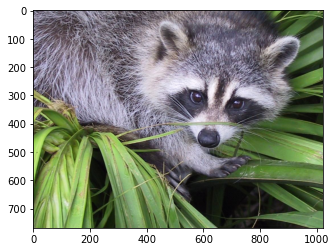

In [2]:
import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

## 2. Creación de un arreglo numpy de un archivo de imagen

In [4]:
from scipy import misc
face = misc.face()
io.imwrite('face.png', face) # Se salva la imagen como png
face = io.imread('face.png') # Se lee la imagen png
type(face) 
face.shape, face.dtype

((768, 1024, 3), dtype('uint8'))

## 3. Abrir archivos raw

In [5]:
import numpy as np
face.tofile('face.raw') # Se crea el archivo raw binario
face_from_raw = np.fromfile('face.raw', dtype=np.uint8)
face_from_raw.shape

(2359296,)

In [6]:
face_from_raw.shape = (768, 1024, 3)

In [30]:
face_memmap = np.memmap('face.raw', dtype=np.uint8, shape=(768, 1024, 3))
face_memmap

memmap([[[121, 112, 131],
         [138, 129, 148],
         [153, 144, 165],
         ...,
         [119, 126,  74],
         [131, 136,  82],
         [139, 144,  90]],

        [[ 89,  82, 100],
         [110, 103, 121],
         [130, 122, 143],
         ...,
         [118, 125,  71],
         [134, 141,  87],
         [146, 153,  99]],

        [[ 73,  66,  84],
         [ 94,  87, 105],
         [115, 108, 126],
         ...,
         [117, 126,  71],
         [133, 142,  87],
         [144, 153,  98]],

        ...,

        [[ 87, 106,  76],
         [ 94, 110,  81],
         [107, 124,  92],
         ...,
         [120, 158,  97],
         [119, 157,  96],
         [119, 158,  95]],

        [[ 85, 101,  72],
         [ 95, 111,  82],
         [112, 127,  96],
         ...,
         [121, 157,  96],
         [120, 156,  94],
         [120, 156,  94]],

        [[ 85, 101,  74],
         [ 97, 113,  84],
         [111, 126,  97],
         ...,
         [120, 156,  95],
        

## Despliegue de imágenes

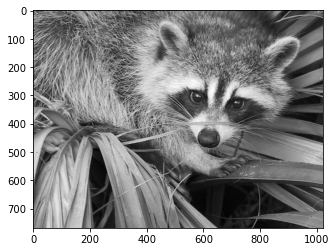

In [31]:
f = misc.face(gray=True) # Lee la imagen en escala de grises
import matplotlib.pyplot as plt
plt.imshow(f, cmap=plt.cm.gray);

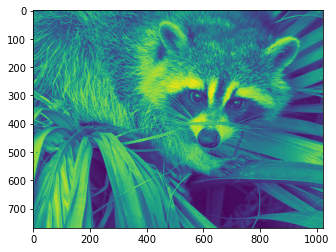

In [32]:
plt.imshow(f);

In [10]:
f.shape

(768, 1024)

Solo se muestra el ancho y alto de la imagen.

Incrementando el contraste

(-0.5, 1023.5, 767.5, -0.5)

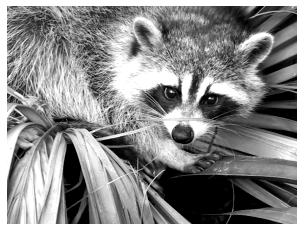

In [11]:
plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=200) 
# Remueve los ejes y las marcas (ticks)
plt.axis('off')

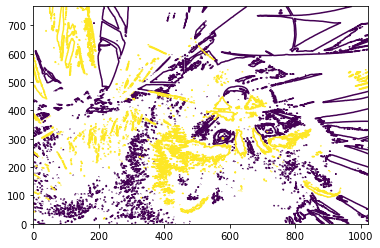

In [12]:
plt.contour(f, [50, 200]) 

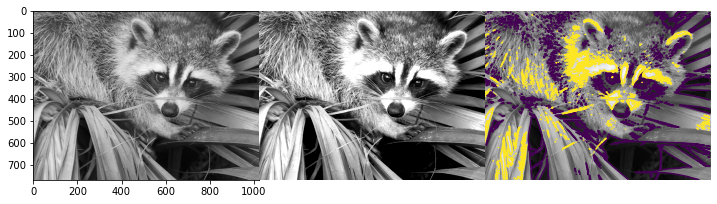

In [13]:
import scipy.misc
import matplotlib.pyplot as plt

f = scipy.misc.face(gray=True)

plt.figure(figsize=(10, 3.6))

plt.subplot(131)
plt.imshow(f, cmap=plt.cm.gray)

plt.subplot(132)
plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=200)
plt.axis('off')

plt.subplot(133)
plt.imshow(f, cmap=plt.cm.gray)
plt.contour(f, [50, 200])
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0., top=0.99, bottom=0.01, left=0.05,
                    right=0.99)
plt.show()

#### Investigue y ponga una breve descripción sobre la instrucción contour.

Dibuja gráficos de contorno para realizar análisis multivariados y visualizar graficos 3D en un espacio 2D, puede indicar que las elevaciones no son iguales, o para brillo, densidad entre otras.

#### Obtenga y despliegue los contornos de la imagen contour_gray.png con las siguientes instrucciones (antes debe cargar la imagen contour_gray.png en la variable f):

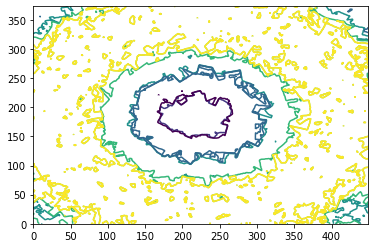

In [14]:
f = io.imread('contour_gray.png')
plt.contour(f, 5)
plt.contour(f, [50, 100, 200])

## 5. Manipulaciones básicas

In [15]:
# Obtiene el valor de un pixel de la imagen
face = misc.face(gray=True)
face[0, 40]

127

In [16]:
# Accesando secciones de la imagen
face[10:13, 20:23]

array([[141, 153, 145],
       [133, 134, 125],
       [ 96,  92,  94]], dtype=uint8)

In [17]:
face[100:120] = 255

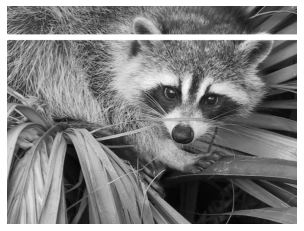

In [18]:
plt.imshow(face, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

#### Pinte una franja vertical gris en la imagen que vaya de la columna 200 a la columna 220. Tip: en los índices tiene que elegir todas las filas con : y luego indicar las columnas deseadas.

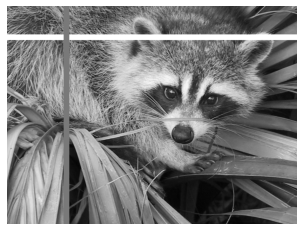

In [19]:
face[:, 200:220] = 122
plt.imshow(face, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [20]:
lx, ly = face.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4
# Masks
face[mask] = 0
# Indexado con rangos
face[range(400), range(400)] = 255

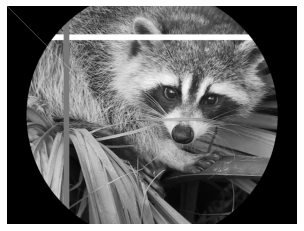

In [21]:
plt.imshow(face, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [22]:
print(lx,",",ly)

768 , 1024


In [23]:
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 6
face[mask] = 0

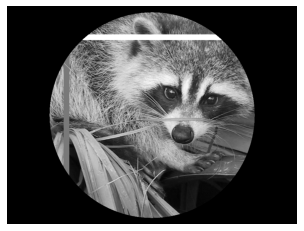

In [24]:
plt.imshow(face, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [25]:
face = misc.face(gray=True)
face.mean()
face.max(), face.min()

(250, 0)

<BarContainer object of 256 artists>

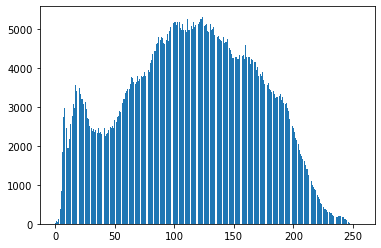

In [26]:
face = misc.face(gray=True)
hist, bins = np.histogram(face, bins=256, range=(0,256))
plt.bar(bins[0:-1], hist)

<BarContainer object of 64 artists>

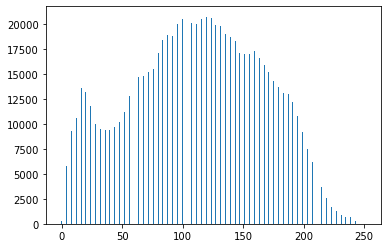

In [27]:
hist, bins = np.histogram(face, bins=64, range=(0,255))
plt.bar(bins[0:-1], hist)

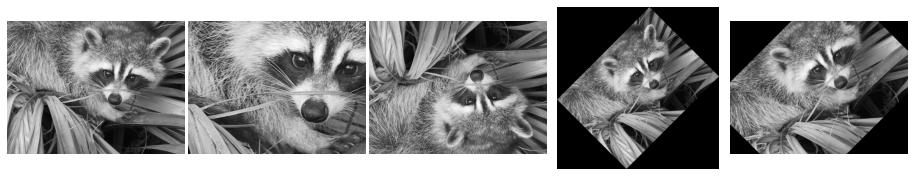

In [28]:
from scipy import ndimage
#Transformaciones geométricas
face = misc.face(gray=True)
lx, ly = face.shape
# Recorte
crop_face = face[lx // 4: - lx // 4, ly // 4: - ly // 4]
# up <-> down Voltear verticalmente
flip_ud_face = np.flipud(face)
# Rotación
rotate_face = ndimage.rotate(face, 45)
rotate_face_noreshape = ndimage.rotate(face, 45, reshape=False)
plt.figure(figsize=(12.5, 2.5))

plt.subplot(151)
plt.imshow(face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(152)
plt.imshow(crop_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(153)
plt.imshow(flip_ud_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(154)
plt.imshow(rotate_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(155)
plt.imshow(rotate_face_noreshape, cmap=plt.cm.gray)
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0,
                    right=1)

plt.show()

#### Investigue el operador // y ponga una breve descripción.

Realiza la división con resultado de número entero	
Ejemplo: 18 // 5 = 3

No obstante hay que tener en cuenta que si utilizamos dos operandos enteros, Python determinará que quiere que la variable resultado también sea un entero, por lo que el resultado de, por ejemplo, 3 / 2 y 3 // 2 sería el mismo: 1.

#### ¿Qué efecto tiene el signo negativo en crop_face = face[lx // 4: - lx // 4, ly // 4: - ly // 4]?

El valor de lx es de 192 y el de ly es de 256
El signo negativo se refiera a que va a regresar el valor de la posición 192 y 256 empezando desde el final del arreglo

#### Voltee la imagen original del mapache, pero esta vez horizontalmente, de izquierda a derecha

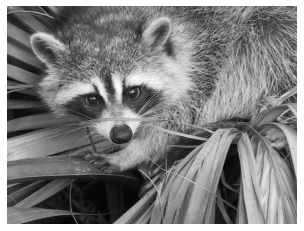

In [29]:
# left <-> right Voltear horizontalmente
flip_lr_face = np.fliplr(face)
plt.imshow(flip_lr_face, cmap=plt.cm.gray)
plt.axis('off')
plt.show()